![title](titanic.png)

## Import Libraries 

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

## Exploring Dataset

In [68]:
data=pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
data.shape

(891, 12)

In [71]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [72]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
data.duplicated().sum()

0

##  Data Visualization

In [74]:
sex_counts=data['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

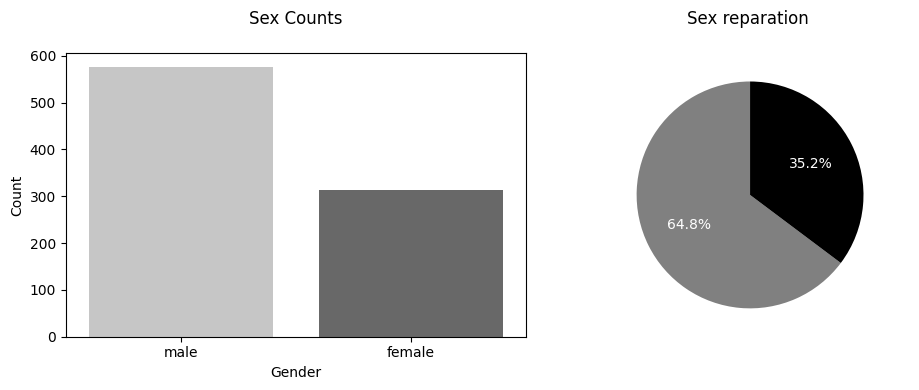

In [75]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Greys')
plt.title('Sex Counts\n')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['gray', 'black'], startangle=90,textprops={'color': 'white'})
plt.title('Sex reparation \n')
plt.tight_layout()
plt.show()

In [76]:
age_counts=data['Age'].value_counts()
age_counts

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

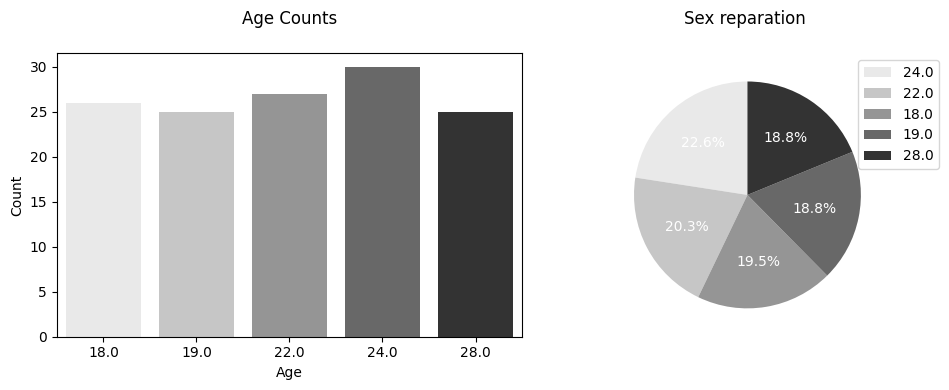

In [93]:
age_counts=data['Age'].value_counts().head()
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=age_counts.index, y=age_counts.values, palette='Greys')
plt.title('Age Counts\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
gray_shades = sns.color_palette('Greys', n_colors=len(age_counts))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=gray_shades, startangle=90, textprops={'color': 'white'})
plt.title('Sex reparation \n')
plt.tight_layout()
plt.legend(labels=age_counts.index, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

In [53]:
pclass_counts=data['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

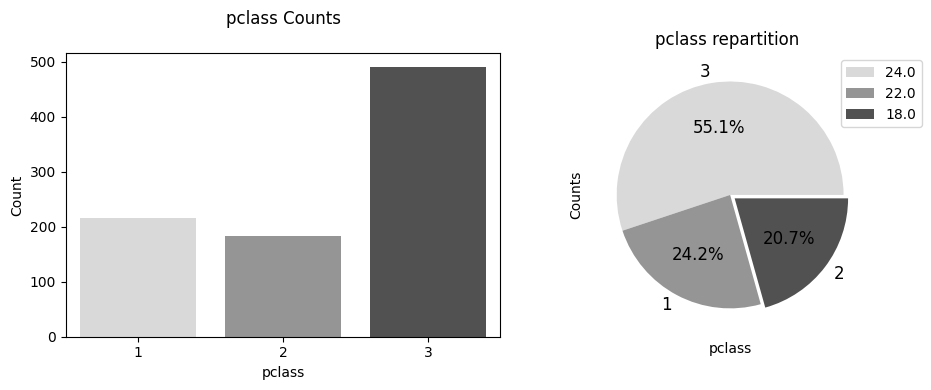

In [103]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette='Greys')
plt.title('pclass Counts\n')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
gray_palette = sns.color_palette('Greys', n_colors=len(pclass_counts))
explode = (0, 0, 0.05)
pclass_counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%.1f%%', colors=gray_palette)
plt.title('pclass repartition ')
plt.xlabel('pclass')
plt.ylabel('Counts')
plt.legend(labels=age_counts.index, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

In [105]:
SibSp_counts=data['SibSp'].value_counts()
SibSp_counts

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

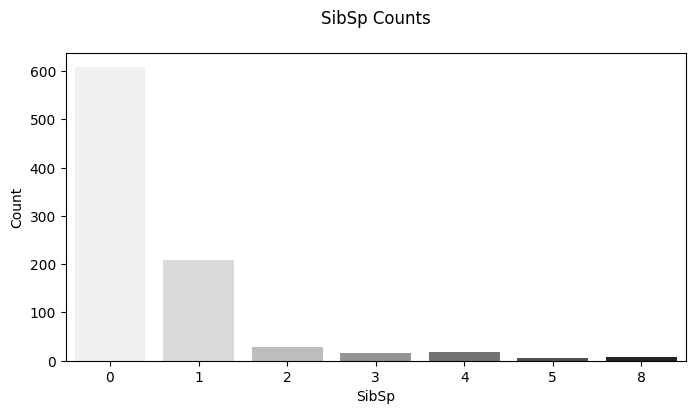

In [111]:
plt.figure(figsize=(8, 4))
sns.barplot(x=SibSp_counts.index, y=SibSp_counts.values, palette='Greys')
plt.title('SibSp Counts\n')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

In [112]:
Parch_counts=data['Parch'].value_counts()
Parch_counts

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

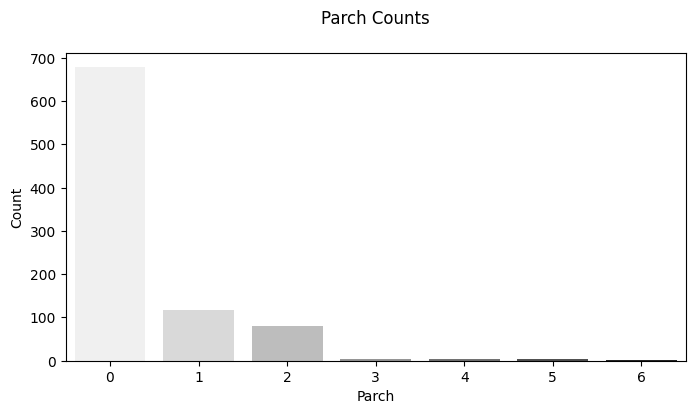

In [114]:
plt.figure(figsize=(8, 4))
sns.barplot(x=Parch_counts.index, y=Parch_counts.values, palette='Greys')
plt.title('Parch Counts\n')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

In [116]:
Embarked_counts=data['Embarked'].value_counts()
Embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

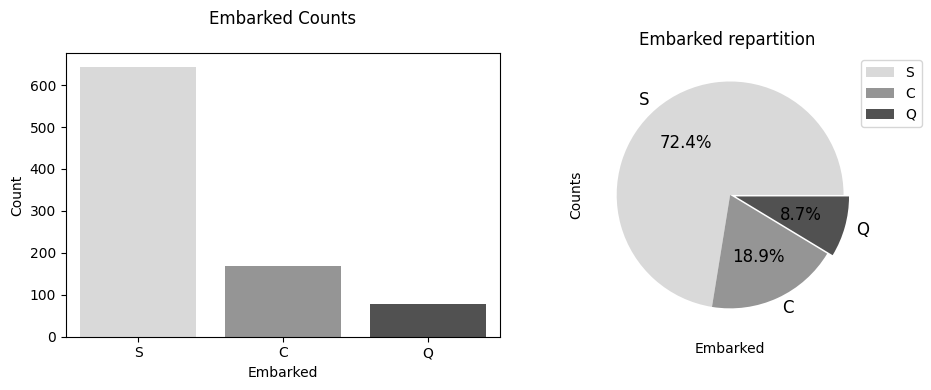

In [118]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=Embarked_counts.index, y=Embarked_counts.values, palette='Greys')
plt.title('Embarked Counts\n')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
gray_palette = sns.color_palette('Greys', n_colors=len(Embarked_counts))
explode = (0, 0, 0.05)
Embarked_counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%.1f%%', colors=gray_palette)
plt.title('Embarked repartition ')
plt.xlabel('Embarked')
plt.ylabel('Counts')
plt.legend(labels=Embarked_counts.index, loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

In [119]:
Survived_counts=data['Survived'].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

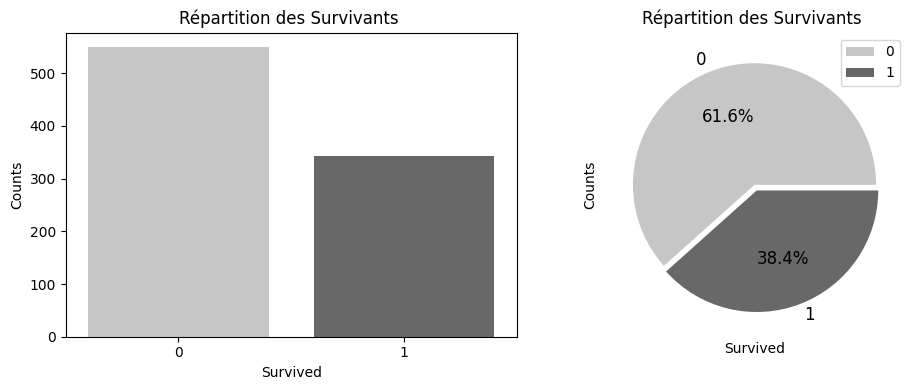

In [132]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=Survived_counts.index, y=Survived_counts.values, palette='Greys')
plt.title('Répartition des Survivants ')
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.subplot(1, 2, 2)
gray_palette = sns.color_palette('Greys', n_colors=len(Survived_counts))
explode = (0, 0.05)
Survived_counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%.1f%%', colors=gray_palette)
plt.title('Répartition des Survivants ')
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.legend(labels=Survived_counts.index, loc="best")
plt.tight_layout()
plt.show()

#### visulize age ,gender, sibsp, parch , pclass are survived or not

<Figure size 1500x800 with 0 Axes>

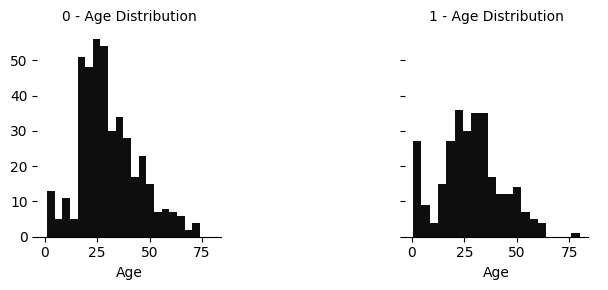

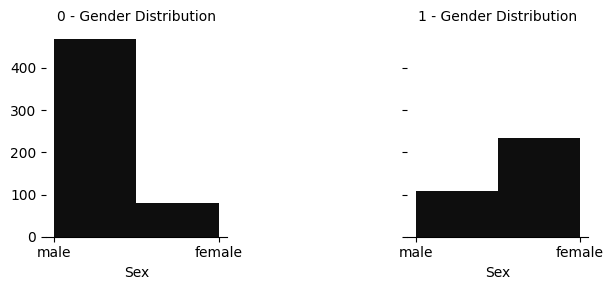

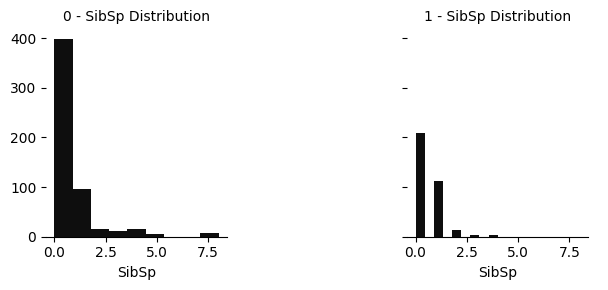

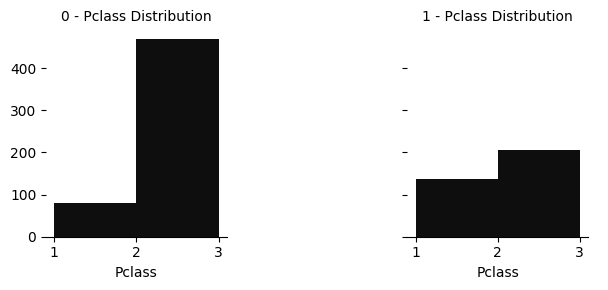

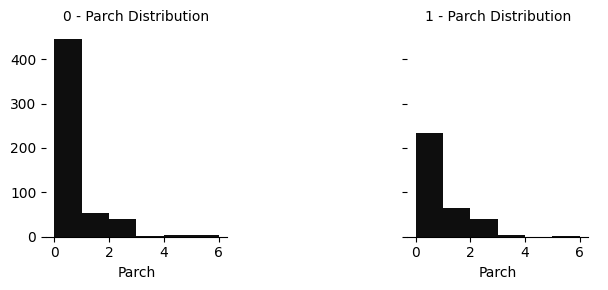

In [160]:
gray_palette = sns.color_palette('Greys', n_colors=20)

# Créer un FacetGrid pour l'âge par rapport à la survie
plt.figure(figsize=(15, 8))
age = sns.FacetGrid(data, col='Survived')
age.map(plt.hist, 'Age', bins=20, color=gray_palette[-1])
age.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
age.add_legend()
age.set_titles(col_template="{col_name} - Age Distribution")

# Créer un FacetGrid pour le genre par rapport à la survie
gender = sns.FacetGrid(data, col='Survived')
gender.map(plt.hist, 'Sex', bins=2, color=gray_palette[-1])
gender.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
gender.add_legend()
gender.set_titles(col_template="{col_name} - Gender Distribution")

# Créer un FacetGrid pour 'SibSp' par rapport à la survie
sibsp = sns.FacetGrid(data, col='Survived')
sibsp.map(plt.hist, 'SibSp', bins=9, color=gray_palette[-1])
sibsp.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
sibsp.add_legend()
sibsp.set_titles(col_template="{col_name} - SibSp Distribution")

# Créer un FacetGrid pour 'Pclass' par rapport à la survie
pclass = sns.FacetGrid(data, col='Survived')
pclass.map(plt.hist, 'Pclass', bins=[1, 2, 3], color=gray_palette[-1])
pclass.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
pclass.add_legend()
pclass.set_titles(col_template="{col_name} - Pclass Distribution")

# Créer un FacetGrid pour 'Parch' par rapport à la survie
parch = sns.FacetGrid(data, col='Survived')
parch.map(plt.hist, 'Parch', bins=sorted(Parch_counts.index), color=gray_palette[-1])
parch.despine(left=True, right=True)
plt.subplots_adjust(wspace=1)
parch.add_legend()
parch.set_titles(col_template="{col_name} - Parch Distribution")

plt.show()

## Data Preprocessing

In [161]:
data=data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [162]:
# convertir le gender en 0 et 1
data['Sex']=data['Sex'].replace({'male':1,'female':0})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [164]:
# Remplissez les valeurs manquantes dans la colonne âge en imputant la médiane
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [165]:
# Remplissez les valeurs manquantes dans la colonne embarked en imputant le mode
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [189]:
data['Embarked']=data['Embarked'].replace({'S':1,'C':2,'Q':3})
data.head(200)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
195,1,1,0,58.0,0,0,146.5208,2
196,0,3,1,28.0,0,0,7.7500,3
197,0,3,1,42.0,0,1,8.4042,1
198,1,3,0,28.0,0,0,7.7500,3


In [168]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


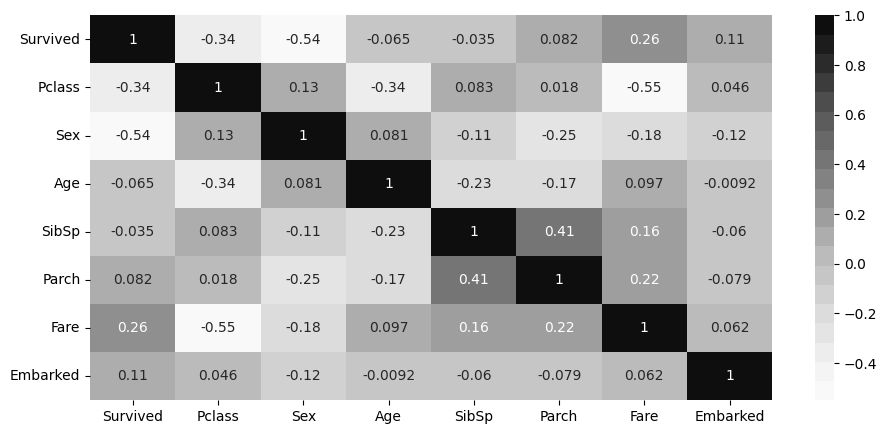

In [173]:
gray_palette = sns.color_palette('Greys', n_colors=20)
plt.figure(figsize=(11, 5))
sns.heatmap(data.corr(), annot=True, cmap=gray_palette)
plt.show()

## PREPARE THE DATA FOR ALGORITHMES

In [175]:
X=data.drop(columns=['Survived'])
y=data['Survived']

In [176]:
y=y.values.reshape(-1,1)

#### Normalise Data (Data Scaling ) 

In [177]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

#### Split Data 

In [222]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

## Logistic Regression

In [191]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

#### Prediction dans Train 

In [192]:
y_pred_train=clf.predict(X_train)
print(classification_report(y_train,y_pred_train))
score=accuracy_score(y_train,y_pred_train)
print(f'Accuracy: {round(score*100,2)}%')

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       392
           1       0.76      0.68      0.72       231

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.78       623
weighted avg       0.80      0.80      0.80       623

Accuracy: 80.26%


#### Prediction dans Test

In [193]:
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[135  22]
 [ 32  79]]


In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       157
           1       0.78      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [195]:
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 79.85%


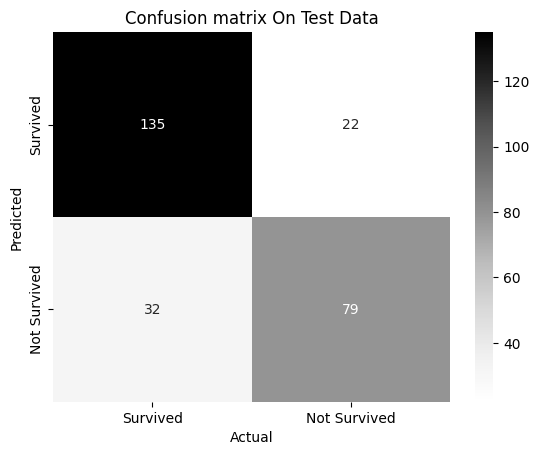

In [196]:
new_cm = pd.DataFrame(cm , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

#### Best parametres dans Regression logistique

In [219]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs','saga']  
}
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

Meilleurs paramètres : {'C': 10, 'solver': 'liblinear'}
Meilleure précision : 0.8009290322580647


#### Tester la regression lineaire sur nouveaux phrases jamais vu 

In [217]:
new_data = pd.DataFrame({
    'Pclass': [3, 1],
    'Sex': ['male', 'female'],
    'Age': [22.0, 38.0],
    'SibSp': [1, 1],
    'Parch': [0, 1],
    'Fare': [7.2500, 71.2833],
    'Embarked': ['S', 'C']
})
new_data['Sex'] = new_data['Sex'].replace({'male': 1, 'female': 0})
new_data['Embarked'] = new_data['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})
new_data['Age'].fillna(new_data['Age'].median(), inplace=True)
new_data['Embarked'].fillna(new_data['Embarked'].mode()[0], inplace=True)
clf = LogisticRegression()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
new_data_scaled = scaler.transform(new_data)
clf.fit(X_train_scaled, y_train)
predictions = clf.predict(new_data_scaled)
for i, prediction in enumerate(predictions):
    print(f"Candidat {i + 1}: Survivant" if prediction == 1 else f"Candidat {i + 1}: Non survivant")


Candidat 1: Non survivant
Candidat 2: Non survivant


## Decision tree

In [220]:
modele_arbre_decision = DecisionTreeClassifier(random_state=42)
modele_arbre_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [225]:
y_pred = modele_arbre_decision.predict(X_test)

In [226]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

[[125  32]
 [ 33  78]]


In [227]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       157
           1       0.71      0.70      0.71       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [228]:
score_rf=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 75.75%


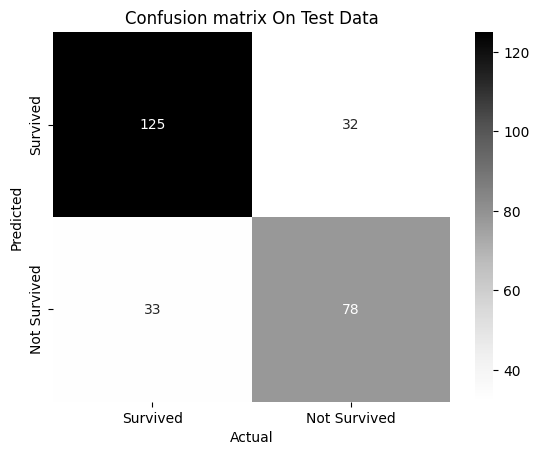

In [230]:
new_cm = pd.DataFrame(cm_nb , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

####  Best parametres dans Decision tree

In [231]:
param_grid = {
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

Meilleurs paramètres : {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Meilleure précision : 0.8137935483870968


## KNN

In [255]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [256]:
y_pred = knn.predict(X_test)

In [257]:
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

[[141  16]
 [ 40  71]]


In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       157
           1       0.82      0.64      0.72       111

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [259]:
score_rf=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 79.1%


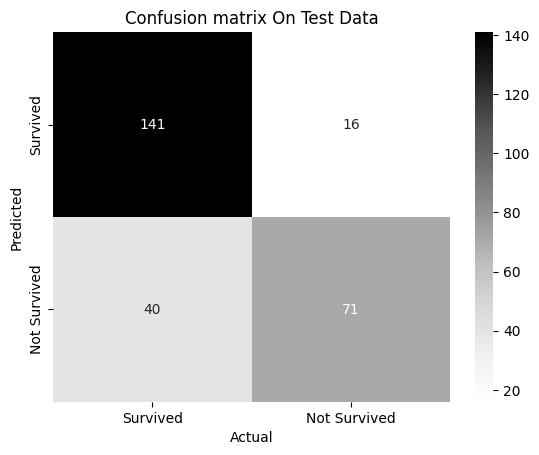

In [260]:
new_cm = pd.DataFrame(cm_knn , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

#### Best parametres dans KNN 

In [249]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
print("Meilleurs paramètres pour k-NN :", knn_grid_search.best_params_)
print("Meilleure précision pour k-NN :", knn_grid_search.best_score_)

Meilleurs paramètres pour k-NN : {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Meilleure précision pour k-NN : 0.8138193548387098


## XGBoost

In [252]:
import xgboost as xgb
xg=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=1000, learning_rate=0.001, max_depth=7)
xg.fit(X_train, y_train,early_stopping_rounds=100, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68132
[1]	validation_0-logloss:0.68082
[2]	validation_0-logloss:0.68033
[3]	validation_0-logloss:0.67983
[4]	validation_0-logloss:0.67934
[5]	validation_0-logloss:0.67885
[6]	validation_0-logloss:0.67835
[7]	validation_0-logloss:0.67786
[8]	validation_0-logloss:0.67737
[9]	validation_0-logloss:0.67689
[10]	validation_0-logloss:0.67640
[11]	validation_0-logloss:0.67591
[12]	validation_0-logloss:0.67543
[13]	validation_0-logloss:0.67495
[14]	validation_0-logloss:0.67446
[15]	validation_0-logloss:0.67398
[16]	validation_0-logloss:0.67350
[17]	validation_0-logloss:0.67302
[18]	validation_0-logloss:0.67254
[19]	validation_0-logloss:0.67206
[20]	validation_0-logloss:0.67158
[21]	validation_0-logloss:0.67111
[22]	validation_0-logloss:0.67063
[23]	validation_0-logloss:0.67016
[24]	validation_0-logloss:0.66969
[25]	validation_0-logloss:0.66921
[26]	validation_0-logloss:0.66875
[27]	validation_0-logloss:0.66828
[28]	validation_0-logloss:0.66781
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [261]:
y_pred = xg.predict(X_test)

In [262]:
cm_xg = confusion_matrix(y_test, y_pred)
print(cm_xg)

[[147  10]
 [ 41  70]]


In [263]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       157
           1       0.88      0.63      0.73       111

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



In [264]:
score_rf=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 80.97%


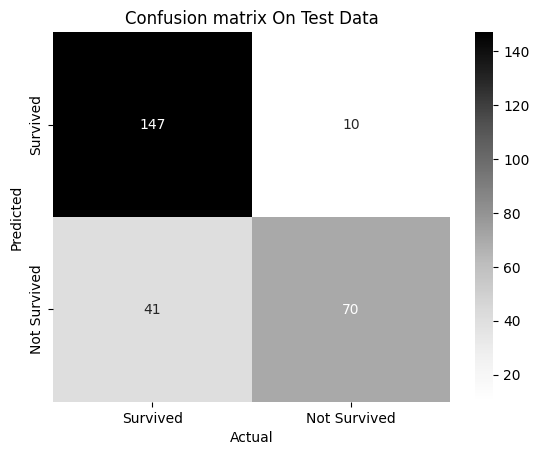

In [266]:
new_cm = pd.DataFrame(cm_xg , index = ['Survived','Not Survived'] , columns = ['Survived','Not Survived'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Survived','Not Survived'], yticklabels = ['Survived','Not Survived'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

#### Best parametres dans XGBoost

In [269]:
xg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=1000, learning_rate=0.001, max_depth=7)
xg.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test, y_test)], verbose=True)
best_iteration = xg.best_iteration
best_xg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=best_iteration, learning_rate=0.001, max_depth=7)
best_xg.fit(X_train, y_train)
y_pred = best_xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Meilleur nombre d'itérations :", best_iteration)
print("Meilleure précision :", accuracy)

[0]	validation_0-logloss:0.68132
[1]	validation_0-logloss:0.68082
[2]	validation_0-logloss:0.68033
[3]	validation_0-logloss:0.67983
[4]	validation_0-logloss:0.67934
[5]	validation_0-logloss:0.67885
[6]	validation_0-logloss:0.67835
[7]	validation_0-logloss:0.67786
[8]	validation_0-logloss:0.67737
[9]	validation_0-logloss:0.67689
[10]	validation_0-logloss:0.67640
[11]	validation_0-logloss:0.67591
[12]	validation_0-logloss:0.67543
[13]	validation_0-logloss:0.67495
[14]	validation_0-logloss:0.67446
[15]	validation_0-logloss:0.67398
[16]	validation_0-logloss:0.67350
[17]	validation_0-logloss:0.67302
[18]	validation_0-logloss:0.67254
[19]	validation_0-logloss:0.67206
[20]	validation_0-logloss:0.67158
[21]	validation_0-logloss:0.67111
[22]	validation_0-logloss:0.67063
[23]	validation_0-logloss:0.67016
[24]	validation_0-logloss:0.66969
[25]	validation_0-logloss:0.66921
[26]	validation_0-logloss:0.66875
[27]	validation_0-logloss:0.66828
[28]	validation_0-logloss:0.66781
[29]	validation_0-loglos